In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


1. Первичный осмотр данных

In [4]:
print('Размер тренировочного датасета')
train_data.shape

Размер тренировочного датасета


(891, 12)

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Как видим, в столбцах Age и Cabin наблюдается большое количество нулевых значений.

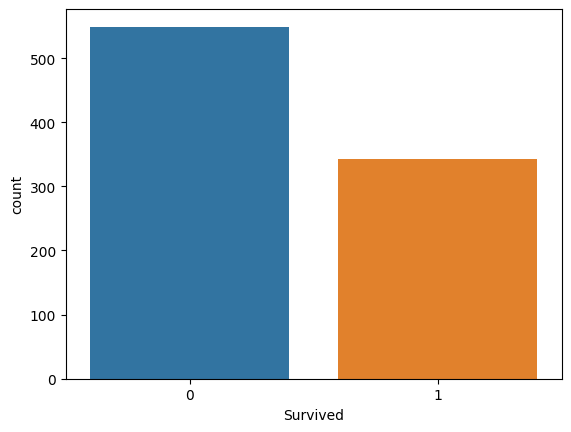

In [6]:
sns.countplot(x = 'Survived',data=train_data)

plt.show()

Оценка выживаемости показала, что в общем больше погибших, нежели выживших.
Посмотрим в процентном соотношении, сколько мужчин и женщин выжило.

In [7]:
male_survived = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)].shape[0]
male_total = train_data[train_data['Sex'] == 'male'].shape[0]
male_survival_rate = (male_survived / male_total) * 100

female_survived = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)].shape[0]
female_total = train_data[train_data['Sex'] == 'female'].shape[0]
female_survival_rate = (female_survived / female_total) * 100

print(f"Процент выживших мужчин: {male_survival_rate:.2f}%")
print(f"Процент выживших женщин: {female_survival_rate:.2f}%")

Процент выживших мужчин: 18.89%
Процент выживших женщин: 74.20%


Теперь проверим, как зависела выживаемость от класса каюты.

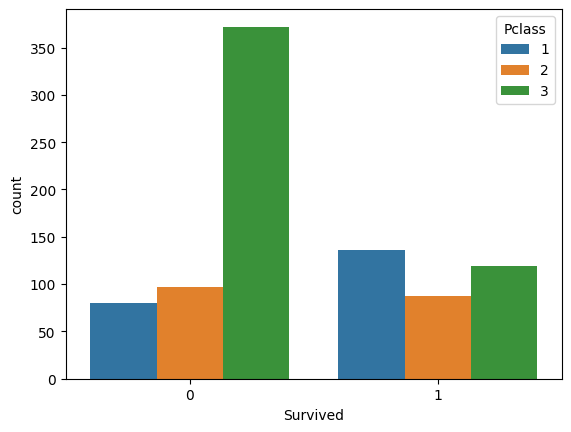

In [8]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)
plt.show()

Из графика видно, что наибольшее число погибших пассажиров было с каюты 3-го класса.

**Вывод**: шансы на выживание напрямую зависят от пола и класса каюты.

2. Обучение модели

In [9]:
features = ['Sex', 'Pclass']
y = train_data['Survived']

In [10]:
X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': y_pred_lr})
output.to_csv('Titanic_LG.csv')

In [12]:
data = pd.read_csv('Titanic_LG.csv')
data

,Unnamed: 0,PassengerId,Survived
0,0,709,0
1,1,439,0
2,2,840,0
3,3,720,1
4,4,39,1
...,...,...,...
174,174,433,0
175,175,773,0
176,176,25,1
177,177,84,1


In [13]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
output = pd.DataFrame({'PassengerId':X_test.index, 'Survived':y_pred_rf})
output.to_csv('Titanic_RF.csv', index=False)

In [14]:
data = pd.read_csv('Titanic_RF.csv')
data

,PassengerId,Survived
0,709,0
1,439,0
2,840,0
3,720,1
4,39,0
...,...,...
174,433,0
175,773,0
176,25,0
177,84,1


In [15]:
print("Accuracy for LG:", accuracy_score(y_test, y_pred_lr))
print("F1-Score for LG:", f1_score(y_test, y_pred_lr))

print("Accuracy for RF:", accuracy_score(y_test, y_pred_rf))
print("F1-Score for RF:", f1_score(y_test, y_pred_rf))

Accuracy for LG: 0.7821229050279329
F1-Score for LG: 0.7272727272727273
Accuracy for RF: 0.7653631284916201
F1-Score for RF: 0.631578947368421


Получили, что логистическая регрессия даёт результат выше